In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# fn = 'cartesian_Kp_100_alpha_10'  # e = 0.5 mm   y ddde = 800
#fn = 'articular_KP_1_alpha_0.01'
#fn = 'articular_KP_100.0_alpha_0.001'
#fn = 'articular_lambda_1_alpha_0.1_gamma_0.99'
fn = 'articular_lambda_1_alpha_0.03_gamma_0.9'
path = '../src/Data/SMCi/circular_traj/'
df = pd.read_csv(os.path.join(path, fn))

def norma_L1 (A, B, C):
    cnt_x = 0.0
    cnt_y = 0.0
    cnt_z = 0.0
    for i in range(len(A)):
        cnt_x = cnt_x + np.abs(1000*A[i])
        cnt_y = cnt_y + np.abs(1000*B[i])
        cnt_z = cnt_z + np.abs(1000*C[i])
    return cnt_x, cnt_y, cnt_z

# position
A = df['e_x'].values
B = df['e_y'].values
C = df['e_z'].values
[cnt_x, cnt_y, cnt_z] = norma_L1(A, B, C)

print("e_x (mm): ", cnt_x/len(A) )
print("e_y (mm): ", cnt_y/len(B) )
print("e_z (mm): ", cnt_z/len(C) )
print("=========================")

# velocity
A = df['de_x'].values
B = df['de_y'].values
C = df['de_z'].values
[cnt_x, cnt_y, cnt_z] = norma_L1(A, B, C)

print("de_x (mm/s): ", cnt_x/len(A) )
print("de_y (mm/s): ", cnt_y/len(B) )
print("de_z (mm/s): ", cnt_z/len(C) )
print("=========================")

# acceleration
A = df['s1'].values
B = df['s2'].values
C = df['s3'].values
[cnt_x, cnt_y, cnt_z] = norma_L1(A, B, C)

print("dde_x (mm/ss): ", cnt_x/len(A) )
print("dde_y (mm/ss): ", cnt_y/len(B) )
print("dde_z (mm/ss): ", cnt_z/len(C) )
print("=========================")

# jerk
A = df['ds1'].values
B = df['ds2'].values
C = df['ds3'].values
[cnt_x, cnt_y, cnt_z] = norma_L1(A, B, C)

print("ddde_x (mm/sss): ", cnt_x/len(A) )
print("ddde_y (mm/sss): ", cnt_y/len(B) )
print("ddde_z (mm/sss): ", cnt_z/len(C) )
print("=========================")


#Orientation
D = df['e_w'].values
E = df['e_ex'].values
F = df['e_ey'].values
G = df['e_ez'].values

cnt_quat = 0.0
for i in range(len(D)):
    cnt_quat = cnt_quat + np.abs( np.sqrt( D[i]*D[i] + E[i]*E[i] + F[i]*F[i] + G[i]*G[i] ) )

print("e_quat: ", cnt_quat/len(D))



0.0014225010489391887


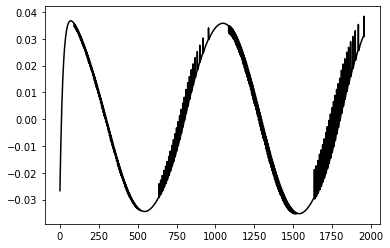

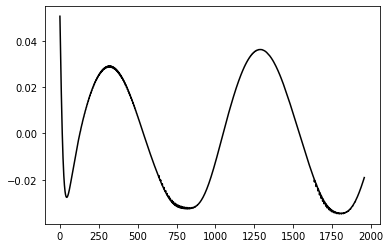

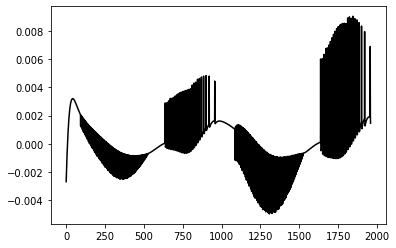

In [33]:
#x = ['x', 'y', 'z', 'w', 'ex', 'ey', 'ez']
#x = ['dx', 'dy', 'dz', 'dw', 'dex', 'dey', 'dez']
#x = ['ddx', 'ddy', 'ddz', 'ddw', 'ddex', 'ddey', 'ddez']
#x = ['dddx', 'dddy', 'dddz', 'dddw', 'dddex', 'dddey', 'dddez']

#x = ['e_x', 'e_y', 'e_z', 'e_w', 'e_ex', 'e_ey', 'e_ez']
#x = ['de_x', 'de_y', 'de_z', 'de_w', 'de_ex', 'de_ey', 'de_ez']
#x = ['dde_x', 'dde_y', 'dde_z', 'dde_w', 'dde_ex', 'dde_ey', 'dde_ez']
#x = ['ddde_x', 'ddde_y', 'ddde_z', 'ddde_w', 'ddde_ex', 'ddde_ey', 'ddde_ez']

#x = ['lambda1', 'lambda2', 'lambda3', 'lambda4', 'lambda5', 'lambda6']
#x = ['dlambda1', 'dlambda2', 'dlambda3', 'dlambda4', 'dlambda5', 'dlambda6']
#x = ['dJ_lambda1', 'dJ_lambda2', 'dJ_lambda3', 'dJ_lambda4', 'dJ_lambda5', 'dJ_lambda6']
#x = ['u1', 'u2', 'u3', 'u4', 'u5', 'u6']
#x = ['J1', 'J2', 'J3', 'J4', 'J5', 'J6']

for i in range(3):
    f = plt.figure()
    v = df['{}'.format(x[i])].values
    #vd = df['{}_des'.format(x[i])].values
    plt.plot(v[40:-1], 'k')
    #plt.plot(vd[40:-1], '--r')
    #plt.legend(('{}'.format(x[i]),'{}_des'.format(x[i])))

    
print(v[len(v)-1])

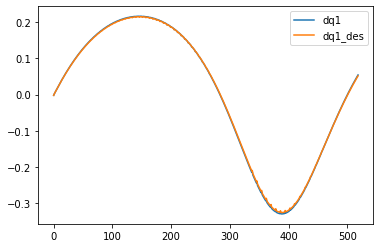

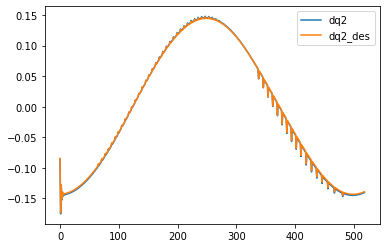

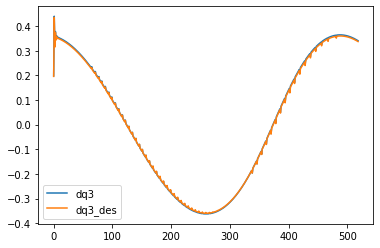

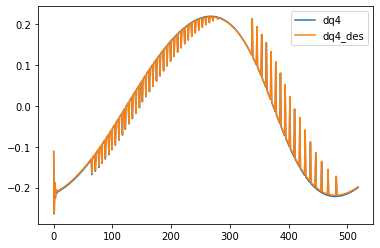

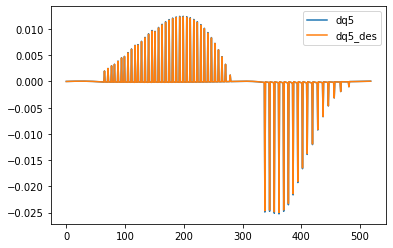

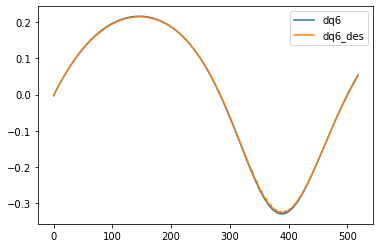

In [42]:
for i in range(1,7):
    f = plt.figure()
    v = df['dq{}'.format(i)].values
    vd = df['dq{}_des'.format(i)].values
    plt.plot(v)
    plt.plot(vd)
    plt.legend(('dq{}'.format(i),'dq{}_des'.format(i)))

In [68]:
for i in range(1,7):
    f = plt.figure()
    v = df['ddq{}'.format(i)].values
    #vd = df['ddq{}_des'.format(i)].values
    plt.plot(v)
    #plt.plot(vd)
    #plt.legend(('ddq{}'.format(i),'ddq{}_des'.format(i)))

KeyError: 'ddq1'

<Figure size 432x288 with 0 Axes>

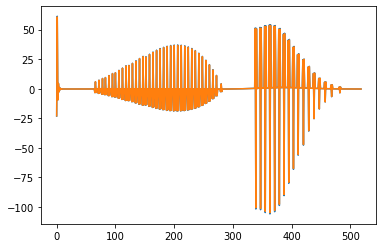

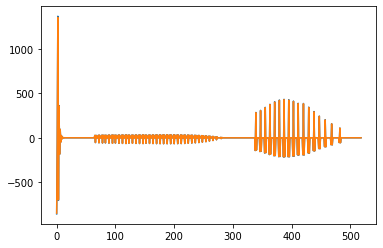

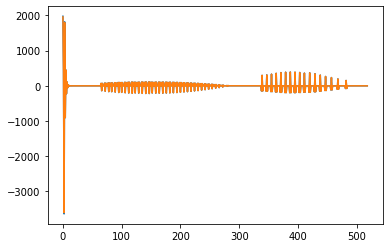

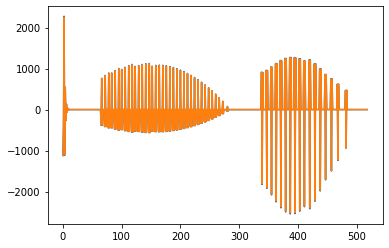

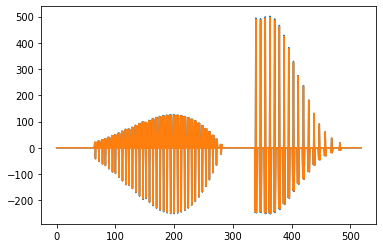

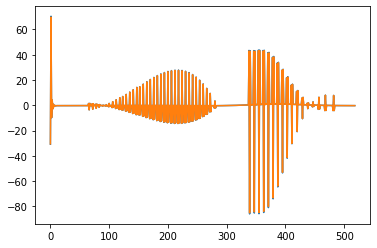

In [46]:
for i in range(1,7):
    f = plt.figure()
    v = df['dddq{}'.format(i)].values
    vd = df['dddq{}_des'.format(i)].values
    plt.plot(v)
    plt.plot(vd)
    #plt.legend(('dddq{}'.format(i),'dddq{}_des'.format(i)))

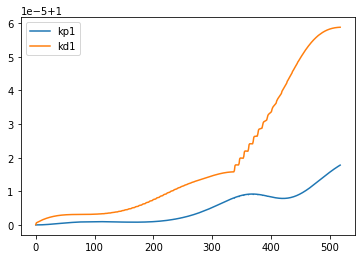

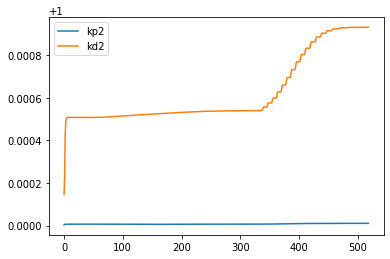

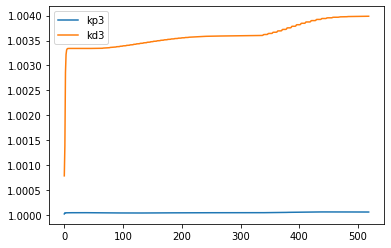

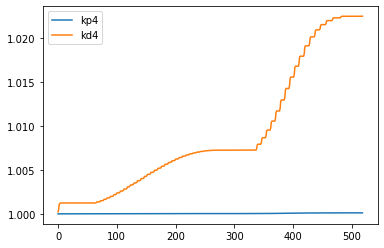

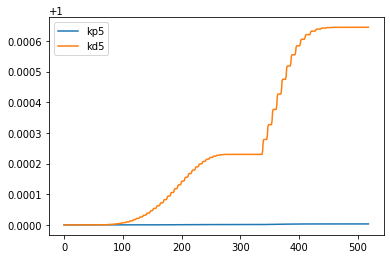

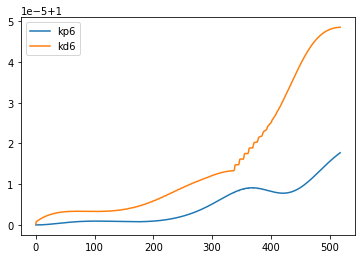

In [47]:
for i in range(1,7):
    f = plt.figure()
    v = df['kp{}'.format(i)].values
    b = df['kd{}'.format(i)].values
    plt.plot(v)
    plt.plot(b)
    plt.legend(('kp{}'.format(i), 'kd{}'.format(i)) )